In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('datasets/bike_sales.csv')

# Display first few rows and info to understand the dataset
print(df.head())
print(df.info())

   Sale_ID       Date  Customer_ID     Bike_Model  Category    Price  \
0        1  7/11/2022       9390.0        Cruiser  Off Road   318.32   
1        2   5/3/2024       3374.0    Hybrid Bike    Hybrid  3093.47   
2        3   9/1/2022       2689.0   Folding Bike      Road  4247.99   
3        4  9/28/2022       3797.0  Mountain Bike  Off Road  1722.01   
4        5   1/5/2021       1633.0            BMX  Off Road  3941.44   

   Quantity Discount Store_Location  Salesperson_ID Payment_Method Channel  \
0       1.0       no   Philadelphia             589      Apple Pay  Online   
1       4.0      yes        Chicago             390      Apple Pay  Online   
2       3.0      yes    San Antonio             338         PayPal  Online   
3       3.0      no     San Antonio             352      Apple Pay  Online   
4       3.0      yes   Philadelphia             580         PayPal  Online   

   Customer_Age Customer_Gender  
0          70.0          Female  
1          37.0            Mal

In [12]:
# Replace missing values with zero
df.fillna(0, inplace=True)

# Make sure no missing data remains
print(df.isnull().sum())

Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Category           0
Price              0
Quantity           0
Discount           0
Store_Location     0
Salesperson_ID     0
Payment_Method     0
Channel            0
Customer_Age       0
Customer_Gender    0
dtype: int64


In [13]:
# Create a 'Sale Amount' column as Price * Quantity
df['Sale Amount'] = df['Price'] * df['Quantity']

# Top 3 Salespeople by Sales Amount for Each City
top_salespeople = (
    df.groupby(['Store_Location', 'Salesperson_ID'])['Sale Amount']
    .sum()
    .reset_index()
    .sort_values(['Store_Location', 'Sale Amount'], ascending=[True, False])
    .groupby('Store_Location')
    .head(3)
)

print(top_salespeople)

     Store_Location  Salesperson_ID  Sale Amount
237         Chicago             377     87787.15
696         Chicago             920     67940.70
29          Chicago             131     60550.84
1108        Houston             510     65232.05
1098        Houston             500     59204.14
822         Houston             175     57535.43
1619    Los Angeles             244     66884.30
1657    Los Angeles             293     66085.02
1867    Los Angeles             543     64583.77
2774       New York             712     79432.55
2493       New York             378     73039.50
2513       New York             404     67570.61
3436   Philadelphia             623     70522.40
3113   Philadelphia             229     65382.22
3173   Philadelphia             298     58676.36
4255        Phoenix             709     73756.65
3764        Phoenix             117     63099.25
3963        Phoenix             356     59696.84
5166    San Antonio             913     74602.81
4738    San Antonio 

In [14]:
# Pivot table for sum and mean of 'Price' by Channel and Category
pivot_price = pd.pivot_table(df, values='Price', index='Channel', columns='Category', aggfunc=['sum', 'mean'])
print(pivot_price)

                 sum                                             mean  \
Category    Electric      Hybrid    Off Road        Road     Electric   
Channel                                                                 
Online    2744108.10  2732296.67  8148464.96  5498309.71  2581.475165   
Store     1431290.82  1332927.10  4123623.48  2906972.29  2569.642406   

                                                 
Category       Hybrid     Off Road         Road  
Channel                                          
Online    2647.574293  2567.254241  2577.735448  
Store     2519.710964  2648.441541  2563.467628  


In [15]:
# Convert 'Date' to datetime if needed and extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Filter for cruisers sold in Chicago, over $2000, by salesperson 782 in 2024
cruisers_chicago = df[
    (df['Category'] == 'Cruiser') &
    (df['Store_Location'] == 'Chicago') &
    (df['Price'] > 2000.0) &
    (df['Salesperson_ID'] == 782) &
    (df['Year'] == 2024)
]

print(cruisers_chicago)

Empty DataFrame
Columns: [Sale_ID, Date, Customer_ID, Bike_Model, Category, Price, Quantity, Discount, Store_Location, Salesperson_ID, Payment_Method, Channel, Customer_Age, Customer_Gender, Sale Amount, Year]
Index: []


In [16]:
# Filter the dataframe for the required conditions
hybrid_sales = df[
    (df['Category'] == 'Hybrid') &
    (df['Channel'] == 'Store') &
    (df['Customer_Age'] >= 50) &
    (df['Customer_Age'] <= 60) &
    (df['Discount'] == 'yes') &
    (df['Year'] == 2023)
]

# Get the unique salespeople IDs
salespeople_hybrid = hybrid_sales['Salesperson_ID'].unique()
print(salespeople_hybrid)

[412 334 323 302 584 772 562 137 212 815 424 585 357 955 734 437]


In [17]:
# Define the commission rate (5%)
commission_rate = 0.05

# Calculate the commission amount for each sale
df['Commission Amount'] = df['Quantity'] * df['Price'] * (commission_rate)

# Calculate the total commission for each salesperson
total_commission = df.groupby('Salesperson_ID')['Commission Amount'].sum().reset_index()

# List the top 5 salespeople based on total commission
top_5_salespeople_commission = total_commission.sort_values(by='Commission Amount', ascending=False).head(5)

print(top_5_salespeople_commission)

     Salesperson_ID  Commission Amount
97              197         11609.6085
463             563         11315.7530
17              117         10637.2465
300             400         10538.7105
129             229         10283.9510


/var/folders/l1/654hn8x929xgr948720kzdk80000gn/T/ipykernel_40893/3368310073.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Store_Location', y='Sale Amount', hue='Category', data=df, estimator=sum, ci=None, width=0.5)


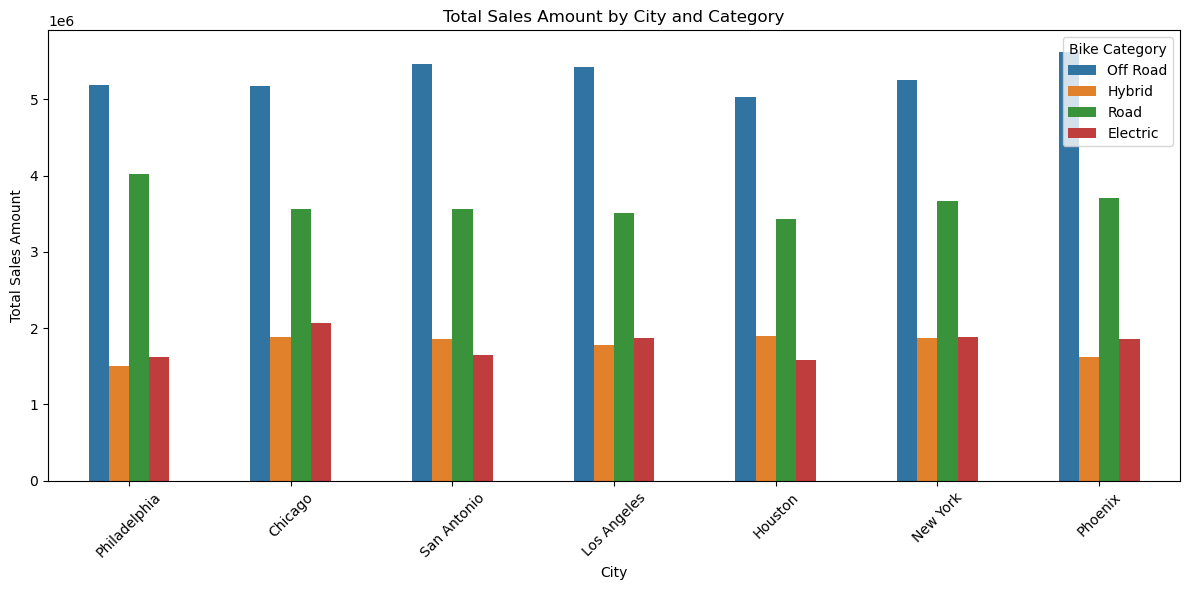

In [28]:
# Calculate total Sale Amount by Store Location
city_sales = df.groupby('Store_Location')['Sale Amount'].sum().reset_index()

# Bar plot of Sale Amount by City and Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Store_Location', y='Sale Amount', hue='Category', data=df, estimator=sum, ci=None, width=0.5)
plt.title('Total Sales Amount by City and Category')
plt.ylabel('Total Sales Amount')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Bike Category')
plt.tight_layout()
plt.show()
